In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('dataset_phishing 2.csv')

In [3]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
features = df.columns.values

In [6]:
features_url_based = features[1:57]

In [7]:
features_url_based

array(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon',
       'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www',
       'nb_com', 'nb_dslash', 'http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain',
       'shortening_service', 'path_extension', 'nb_redirection',
       'nb_external_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_words_raw', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report'], dtype=

In [8]:
df_url_based = df[features_url_based]

In [9]:
df_url_based['status'] = df['status']

/var/folders/mk/d88d1t4d5w13rj554jcl_r5w0000gn/T/ipykernel_66516/923029580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_url_based['status'] = df['status']


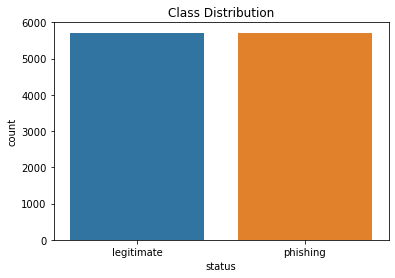

In [10]:
# Class distribution (assuming 'status' is the target variable)
sns.countplot(x='status', data=df)
plt.title('Class Distribution')
plt.show()

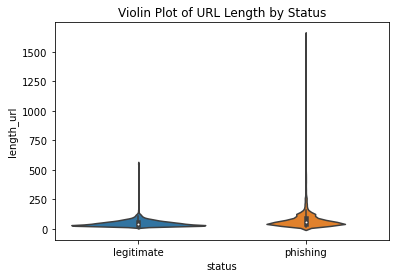

In [11]:
sns.violinplot(data=df, x='status', y='length_url')
plt.title('Violin Plot of URL Length by Status')
plt.show()

In [12]:
categorical_url_based = ['ip', 'https_token', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain',
                        'abnormal_subdomain', 'prefix_suffix','random_domain','shortening_service',
                         'path_extension','domain_in_brand','brand_in_subdomain', 'brand_in_path',
                         'suspecious_tld','statistical_report', 'status']

In [13]:
numerical_url_based = [each for each in features_url_based if each not in categorical_url_based ]

In [14]:
df_url_based['status_value'] = df_url_based['status'].replace({'legitimate': 0, 'phishing': 1})

/var/folders/mk/d88d1t4d5w13rj554jcl_r5w0000gn/T/ipykernel_66516/2522030219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_url_based['status_value'] = df_url_based['status'].replace({'legitimate': 0, 'phishing': 1})


In [15]:
df_url_based['special_character_sum'] = df_url_based.iloc[:, 3:19].sum(axis=1)

/var/folders/mk/d88d1t4d5w13rj554jcl_r5w0000gn/T/ipykernel_66516/638619362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_url_based['special_character_sum'] = df_url_based.iloc[:, 3:19].sum(axis=1)


In [16]:
df_url_based.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length_url               11430 non-null  int64  
 1   length_hostname          11430 non-null  int64  
 2   ip                       11430 non-null  int64  
 3   nb_dots                  11430 non-null  int64  
 4   nb_hyphens               11430 non-null  int64  
 5   nb_at                    11430 non-null  int64  
 6   nb_qm                    11430 non-null  int64  
 7   nb_and                   11430 non-null  int64  
 8   nb_or                    11430 non-null  int64  
 9   nb_eq                    11430 non-null  int64  
 10  nb_underscore            11430 non-null  int64  
 11  nb_tilde                 11430 non-null  int64  
 12  nb_percent               11430 non-null  int64  
 13  nb_slash                 11430 non-null  int64  
 14  nb_star               

In [17]:
df_url_based['common_terms_sum'] = df_url_based['nb_www'] + df_url_based['nb_com'] +\
df_url_based['nb_dslash'] + df_url_based['http_in_path'] 

/var/folders/mk/d88d1t4d5w13rj554jcl_r5w0000gn/T/ipykernel_66516/3378565441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_url_based['common_terms_sum'] = df_url_based['nb_www'] + df_url_based['nb_com'] +\


In [18]:
numerical_url_based = [each for each in df_url_based.columns if each not in categorical_url_based ]

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

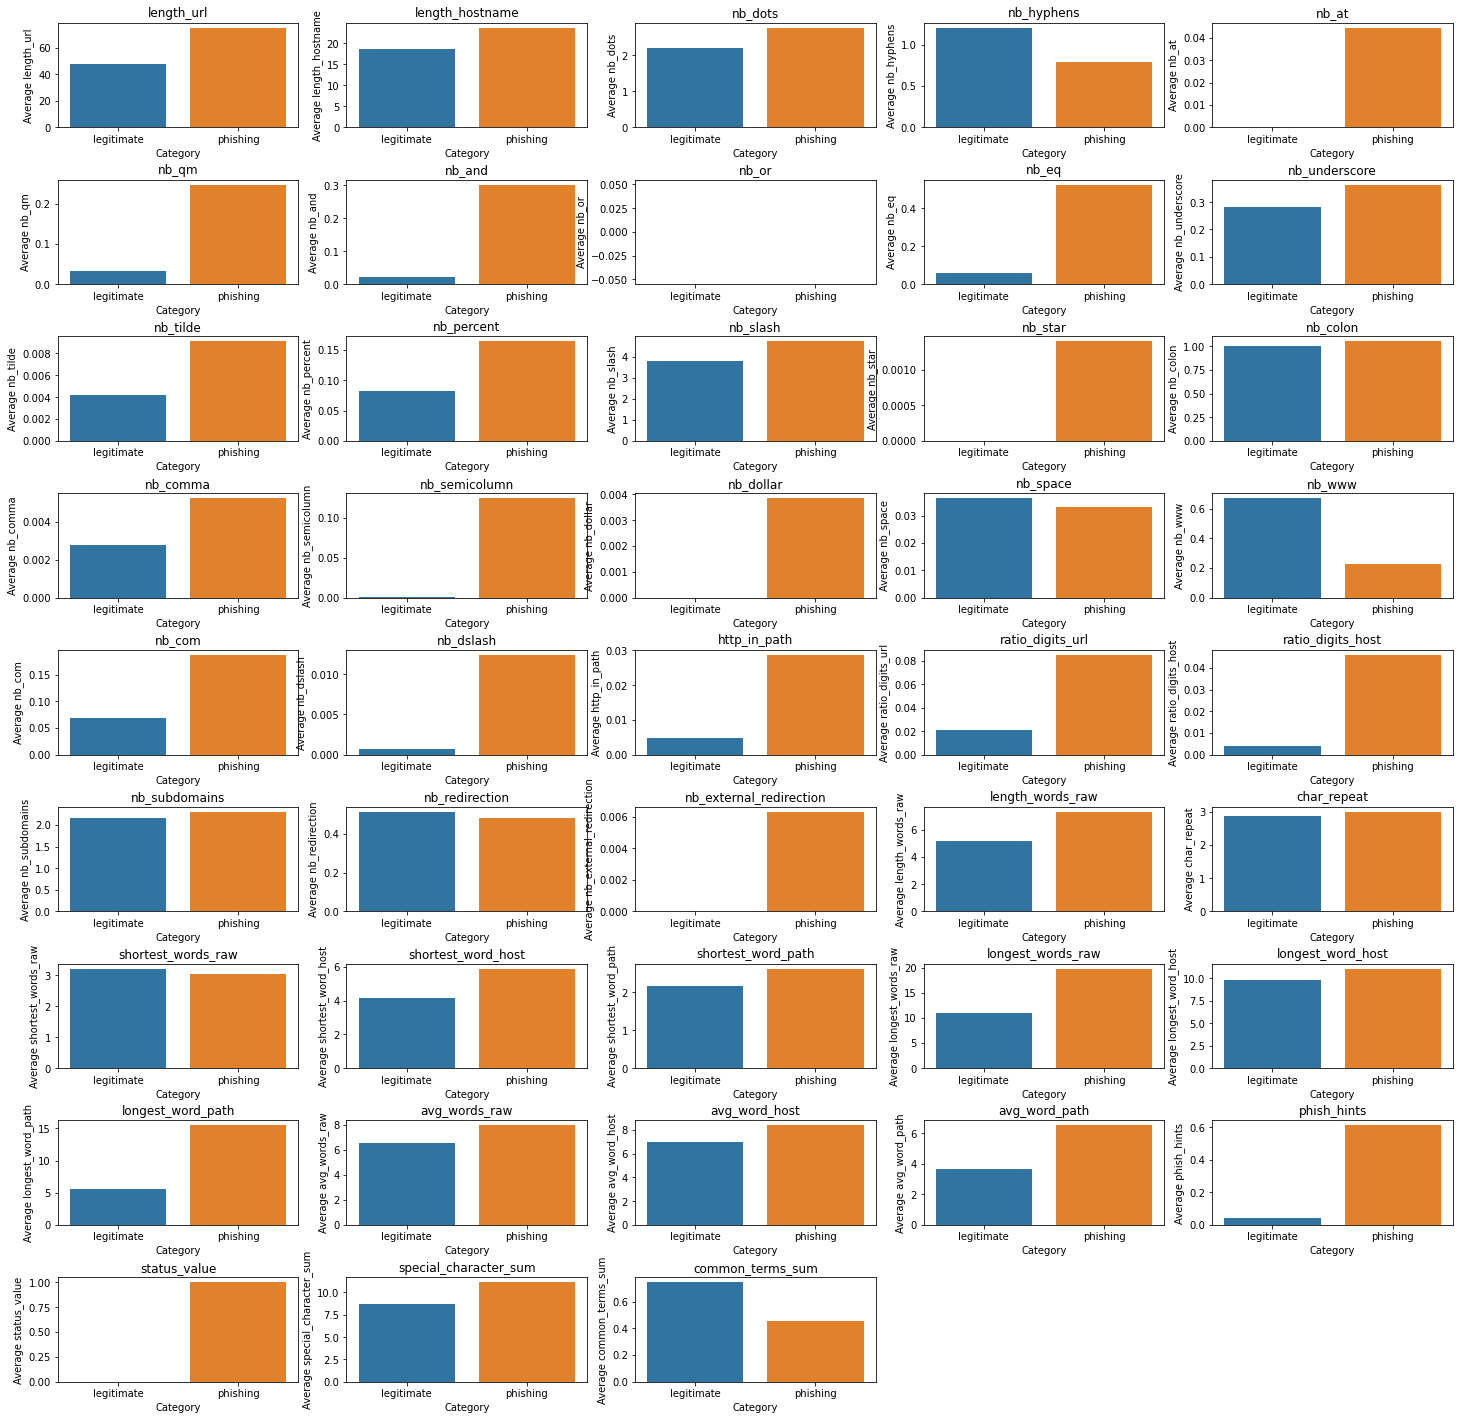

In [20]:
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5)

for i, attr in enumerate(numerical_url_based):
    sns.barplot(x='status', y=attr, data=df_url_based, ax=axes[i // 5, i % 5], ci=None, estimator=pd.Series.mean)
    axes[i // 5, i % 5].set_title(attr)
    axes[i // 5, i % 5].set_xlabel('Category')
    axes[i // 5, i % 5].set_ylabel('Average ' + attr)

for j in range(len(numerical_url_based), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

In [21]:
df_url_based.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length_url               11430 non-null  int64  
 1   length_hostname          11430 non-null  int64  
 2   ip                       11430 non-null  int64  
 3   nb_dots                  11430 non-null  int64  
 4   nb_hyphens               11430 non-null  int64  
 5   nb_at                    11430 non-null  int64  
 6   nb_qm                    11430 non-null  int64  
 7   nb_and                   11430 non-null  int64  
 8   nb_or                    11430 non-null  int64  
 9   nb_eq                    11430 non-null  int64  
 10  nb_underscore            11430 non-null  int64  
 11  nb_tilde                 11430 non-null  int64  
 12  nb_percent               11430 non-null  int64  
 13  nb_slash                 11430 non-null  int64  
 14  nb_star               

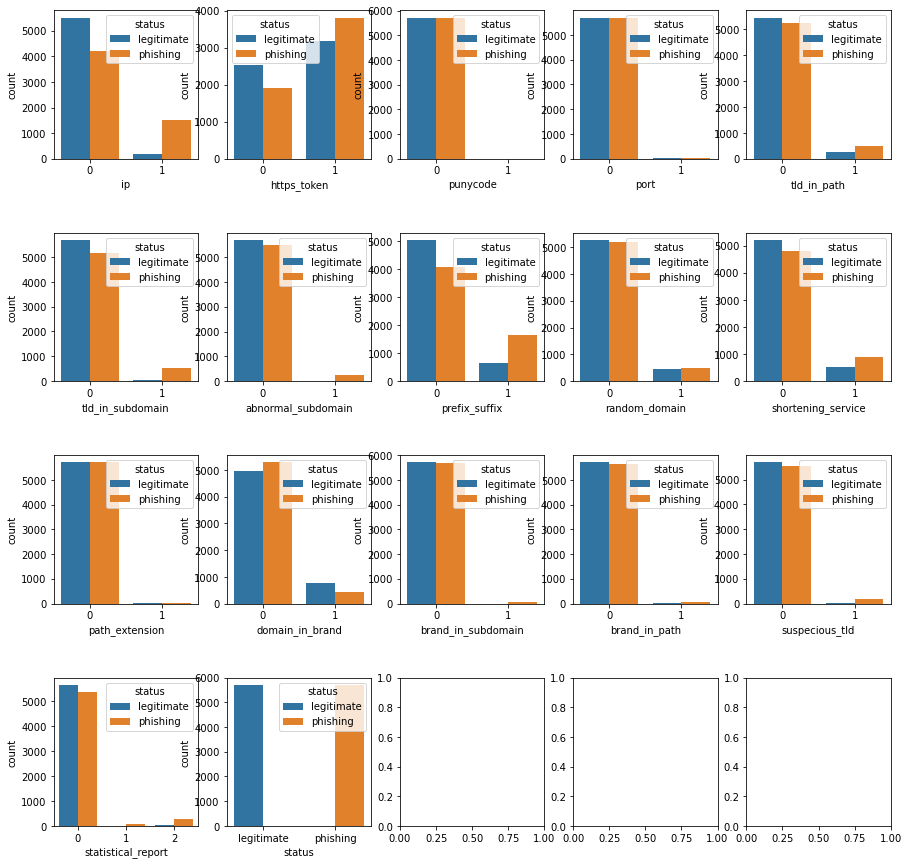

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, attr in enumerate(categorical_url_based):
#     sns.barplot(x='status', y=attr, data=df_url_based, ax=axes[i // 5, i % 5], ci=None, estimator=pd.Series.mean)
    sns.countplot(x=attr, hue='status', data=df_url_based, ax=axes[i // 5, i % 5])
#     axes[i // 5, i % 5].set_title(attr)
#     axes[i // 5, i % 5].set_xlabel('Category')
#     axes[i // 5, i % 5].set_ylabel('Average ' + attr)

for j in range(len(numerical_url_based), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

In [23]:
df_url_based.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'status

In [24]:
df_url_based.drop(['status', 'common_terms_sum', 'special_character_sum'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
X = df_url_based.drop('status_value', axis=1)
y = df_url_based['status_value']

In [26]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [30]:
pca.explained_variance_

array([7.84432401, 3.96305212])

In [78]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = y

Text(0.5, 1.0, 'PCA Visualization of Legitimate and Phishing URLs')

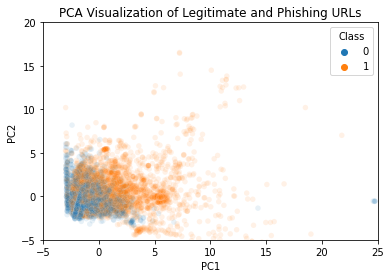

In [79]:
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, s=30, alpha=0.1)
plt.xlim(-5, 25)  # Adjust the limits based on your data
plt.ylim(-5, 20)
plt.title('PCA Visualization of Legitimate and Phishing URLs')

In [80]:
from sklearn.manifold import TSNE


In [97]:
pca = PCA(n_components=40)  # Choose the number of components based on your preference
X_pca = pca.fit_transform(X_std)

In [98]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

In [99]:
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['Class'] = y

Text(0.5, 1.0, 't-SNE Visualization of Legitimate and Phishing URLs after PCA')

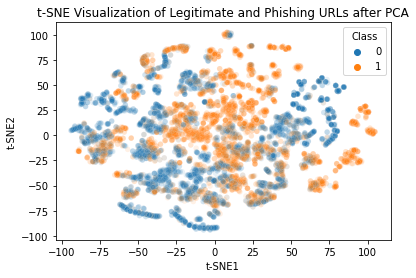

In [100]:
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Class', data=tsne_df,  s=30, alpha=0.1)
plt.title('t-SNE Visualization of Legitimate and Phishing URLs after PCA')

In [91]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=3)  # Adjust parameters based on your data
labels = dbscan.fit_predict(X_std)

Text(0.5, 1.0, 'DBSCAN Clustering of Legitimate and Phishing URLs')

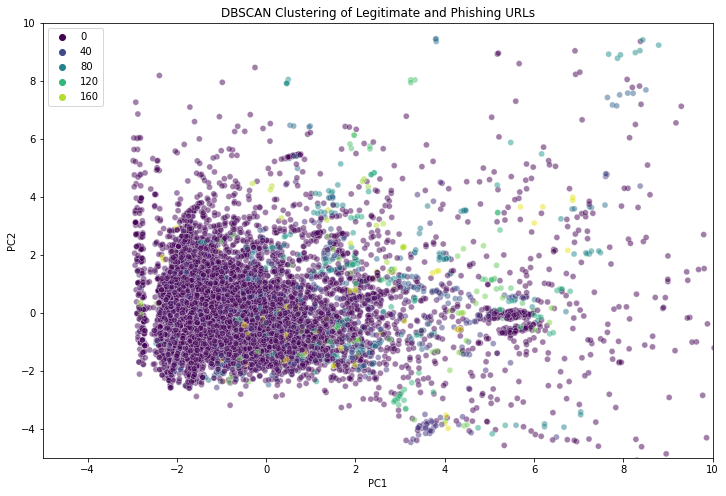

In [96]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue=labels, palette='viridis', data=pca_df, alpha=0.5)
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.title('DBSCAN Clustering of Legitimate and Phishing URLs')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


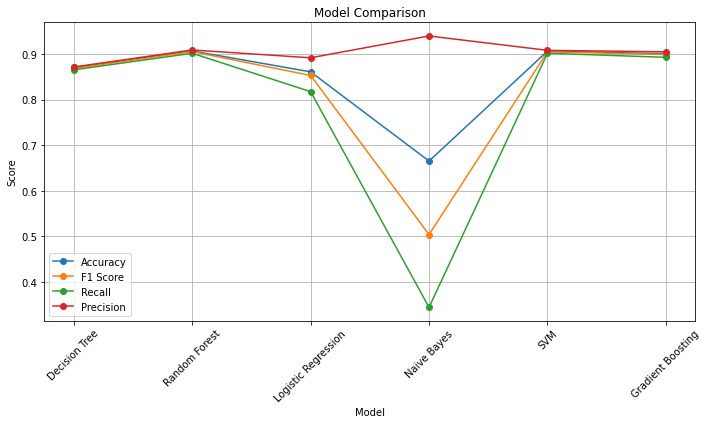

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each classifier
results = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'Recall': [], 'Precision': []}

for model_name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Store results
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)
    results['Recall'].append(recall)
    results['Precision'].append(precision)

# Create a DataFrame from results
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
for metric in metrics:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
results_df

,Model,Accuracy,F1 Score,Recall,Precision
0,Decision Tree,0.870516,0.868444,0.865368,0.871543
1,Random Forest,0.906824,0.905291,0.901683,0.908929
2,Logistic Regression,0.860892,0.853050,0.817538,0.891787
3,Naive Bayes,0.665354,0.504213,0.344553,0.939614
4,SVM,0.906387,0.904889,0.901683,0.908118
5,Gradient Boosting,0.900700,0.898796,0.892826,0.904847


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Voting Classifier (Hard) Metrics:
Accuracy: 0.9051, F1 Score: 0.8996, Recall: 0.8609, Precision: 0.9419

Voting Classifier (Soft) Metrics:
Accuracy: 0.9068, F1 Score: 0.9018, Recall: 0.8663, Precision: 0.9404

Stacking Classifier Metrics:
Accuracy: 0.9169, F1 Score: 0.9159, Recall: 0.9159, Precision: 0.9159


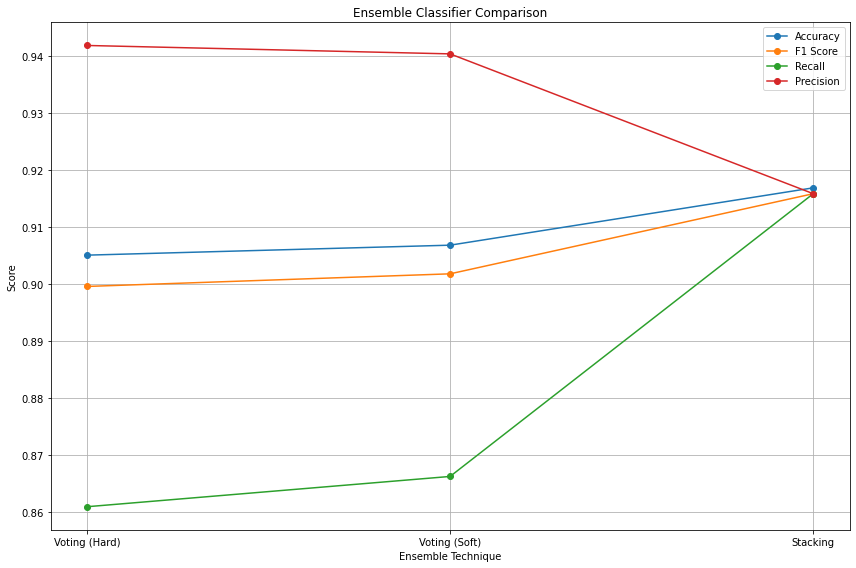

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define individual classifiers
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(probability=True)),  # Note: SVC with probability=True for soft voting
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Create ensemble classifiers
voting_model_hard = VotingClassifier(estimators=classifiers, voting='hard')
voting_model_soft = VotingClassifier(estimators=classifiers, voting='soft')
stacking_model = StackingClassifier(estimators=classifiers, final_estimator=LogisticRegression())

# Train ensemble classifiers
voting_model_hard.fit(X_train, y_train)
voting_model_soft.fit(X_train, y_train)
stacking_model.fit(X_train, y_train)

# Predictions
y_pred_hard = voting_model_hard.predict(X_test)
y_pred_soft = voting_model_soft.predict(X_test)
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate ensemble classifiers
accuracy_hard = accuracy_score(y_test, y_pred_hard)
f1_hard = f1_score(y_test, y_pred_hard)
recall_hard = recall_score(y_test, y_pred_hard)
precision_hard = precision_score(y_test, y_pred_hard)

accuracy_soft = accuracy_score(y_test, y_pred_soft)
f1_soft = f1_score(y_test, y_pred_soft)
recall_soft = recall_score(y_test, y_pred_soft)
precision_soft = precision_score(y_test, y_pred_soft)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)

# Display the results
print(f'Voting Classifier (Hard) Metrics:')
print(f'Accuracy: {accuracy_hard:.4f}, F1 Score: {f1_hard:.4f}, Recall: {recall_hard:.4f}, Precision: {precision_hard:.4f}')

print(f'\nVoting Classifier (Soft) Metrics:')
print(f'Accuracy: {accuracy_soft:.4f}, F1 Score: {f1_soft:.4f}, Recall: {recall_soft:.4f}, Precision: {precision_soft:.4f}')

print(f'\nStacking Classifier Metrics:')
print(f'Accuracy: {accuracy_stacking:.4f}, F1 Score: {f1_stacking:.4f}, Recall: {recall_stacking:.4f}, Precision: {precision_stacking:.4f}')

# Plot results
plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
scores_hard = [accuracy_hard, f1_hard, recall_hard, precision_hard]
scores_soft = [accuracy_soft, f1_soft, recall_soft, precision_soft]
scores_stacking = [accuracy_stacking, f1_stacking, recall_stacking, precision_stacking]

for i, metric in enumerate(metrics):
    plt.plot(['Voting (Hard)', 'Voting (Soft)', 'Stacking'],
             [scores_hard[i], scores_soft[i], scores_stacking[i]],
             marker='o', label=metric)

plt.title('Ensemble Classifier Comparison')
plt.xlabel('Ensemble Technique')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
